<a href="https://colab.research.google.com/github/Romyull-Islam/Credit-Card-Fruad-Detection/blob/master/Parkinson%E2%80%99s%20Syndrome%20Prediction%20with%20Auto%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#check
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Reading dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/parkinsons.csv")

Exploring dataset

In [ ]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


(rows, columns)

In [ ]:
df.shape

(195, 24)

Checking null values

In [ ]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Viewing presence of missing values and types of columns 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Calculating Percentile, Mean & Standard Deviation

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Displaying column names

In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

Target column (Disease: 1- Yes, 0- No)

In [ ]:
df['status'] 

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

Visualization

[]

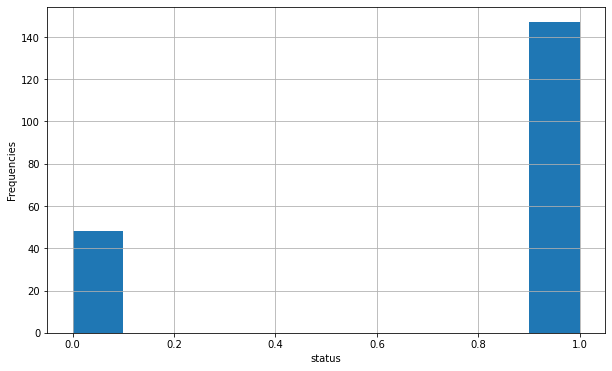

In [ ]:
plt.figure(figsize=(10, 6))
df.status.hist()
plt.xlabel('status')
plt.ylabel('Frequencies')
plt.plot()

NHR, HNR: Measures of ratio of noise to tonal components in the voice

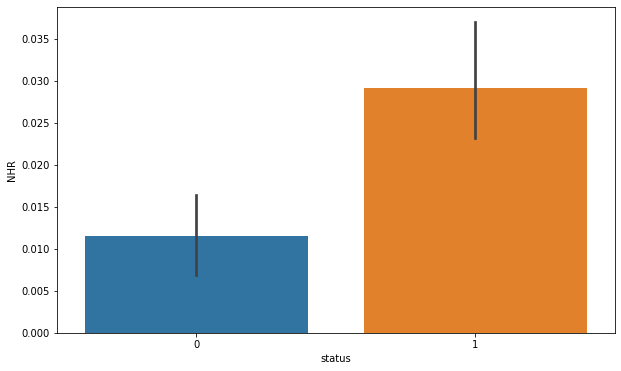

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="NHR",data=df);

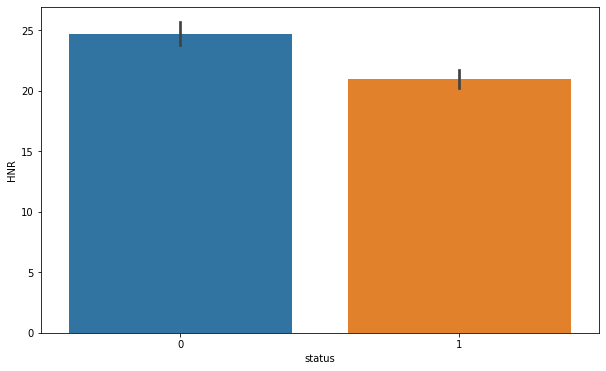

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="HNR",data=df);

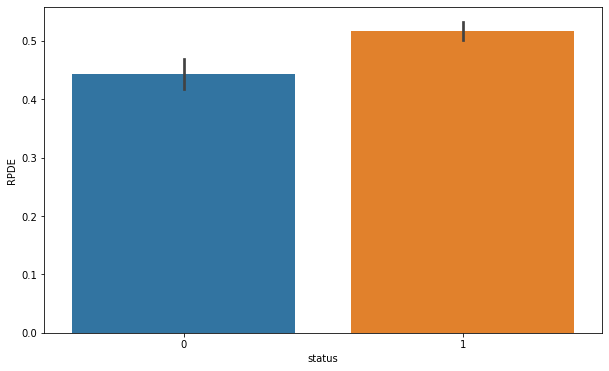

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="RPDE",data=df);

Distribution plot: Displaying a distribution and range of a set of numeric values plotted against a dimension

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

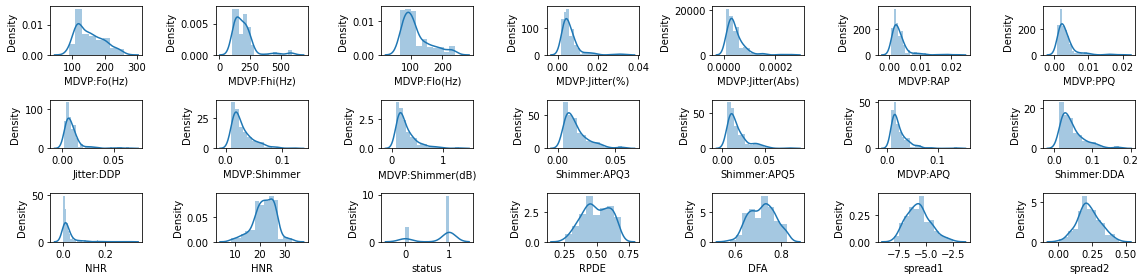

In [ ]:
rows=3
cols=7
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=df.columns
index=1
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()

Removing name column 

In [ ]:
df.drop(['name'],axis=1,inplace=True)

Spitting dataset into x and y

In [ ]:
X=df.drop(labels=['status'],axis=1)
Y=df['status']

Displaying X head

In [ ]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Displaying Y head

In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

Splitting data into x_train, y_train, x_test, y_test

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(156, 22) (39, 22) (156,) (39,)


# Logistic Regression

In [ ]:
log_reg = LogisticRegression().fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Predict on train

In [ ]:
train_preds = log_reg.predict(X_train)

Accuracy on train

In [ ]:
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

Model accuracy on train is:  0.8717948717948718


Predict on test

In [ ]:
test_preds = log_reg.predict(X_test)

Accuracy on test

In [ ]:
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))
print('-'*50)

Model accuracy on test is:  0.8461538461538461
--------------------------------------------------


Confusion matrix

In [ ]:
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds))

confusion_matrix train is:  [[ 24  16]
 [  4 112]]
confusion_matrix test is:  [[ 5  3]
 [ 3 28]]


# Random Forest

In [ ]:
RF=RandomForestClassifier().fit(X_train,Y_train)

Predict on train 

In [ ]:
train_preds2 = RF.predict(X_train)

Accuracy on train

In [ ]:
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

Model accuracy on train is:  1.0


Predict on test

In [ ]:
test_preds2 = RF.predict(X_test)

Accuracy on test

In [ ]:
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))

Model accuracy on test is:  0.8717948717948718


Confusion matrix

In [ ]:
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds2))

confusion_matrix train is:  [[ 40   0]
 [  0 116]]
confusion_matrix test is:  [[ 5  3]
 [ 2 29]]


Wrong Predictions made

In [ ]:
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))

5 / 39


Kappa Score

In [ ]:
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds2))

KappaScore is:  0.587737843551797


Comparing predicted and actual values

In [ ]:
test_preds2

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
test_preds2,Y_test

(array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1]), 96     1
 5      1
 116    1
 35     0
 178    1
 185    0
 54     1
 134    1
 90     1
 187    0
 139    1
 142    1
 175    0
 26     1
 89     1
 140    1
 155    1
 23     1
 132    1
 37     1
 151    1
 28     1
 85     1
 93     1
 172    0
 75     1
 18     1
 105    1
 121    1
 130    1
 33     0
 46     0
 166    0
 163    1
 11     1
 164    1
 81     1
 111    1
 67     1
 Name: status, dtype: int64)

Saving actual and predicted values to a dataframe

In [ ]:
ddf=pd.DataFrame(data=[test_preds2,Y_test])

0 - Predicted Value, 1 - True Value

In [ ]:
ddf.T

,0,1
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,1,0
6,1,1
7,1,1
8,1,1
9,1,0


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Decision Trees

Fit the model on train data

In [ ]:
DT = DecisionTreeClassifier().fit(X,Y)

Predict on train 

In [ ]:
train_preds3 = DT.predict(X_train)

Accuracy on train

In [ ]:
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

Model accuracy on train is:  1.0


Predict on test

In [ ]:
test_preds3 = DT.predict(X_test)

Accuracy on test

In [ ]:
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))

Model accuracy on test is:  1.0


Confusion matrix

In [ ]:
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

confusion_matrix train is:  [[ 40   0]
 [  0 116]]
confusion_matrix test is:  [[ 8  0]
 [ 0 31]]
Wrong predictions out of total
--------------------------------------------------


Wrong Predictions made

In [ ]:
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

0 / 39
--------------------------------------------------


Kappa Score

In [ ]:
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds3))

KappaScore is:  1.0


# Naive Bayes Classifier

In [ ]:
NB=GaussianNB()
NB.fit(X_train,Y_train)

GaussianNB()

Fit the model on train data

In [ ]:
NB=GaussianNB()
NB.fit(X_train,Y_train)

GaussianNB()

Predict on train 

In [ ]:
train_preds4 = NB.predict(X_train)

Accuracy on train

In [ ]:
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

Model accuracy on train is:  0.7307692307692307


Predict on test

In [ ]:
test_preds4 = NB.predict(X_test)

Accuracy on test

In [ ]:
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))

Model accuracy on test is:  0.6923076923076923


Confusion matrix

In [ ]:
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)

confusion_matrix train is:  [[38  2]
 [40 76]]
confusion_matrix test is:  [[ 8  0]
 [12 19]]
Wrong predictions out of total
--------------------------------------------------


Wrong Predictions made.

In [ ]:
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))
print('-'*50)

12 / 39
--------------------------------------------------


 Kappa Score

In [ ]:
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds4))

KappaScore is:  0.3937823834196892


# K-Nearest Neighbours

Fit the model on train data 

In [ ]:
KNN = KNeighborsClassifier().fit(X_train,Y_train)

Predict on train 

In [ ]:
train_preds5 = KNN.predict(X_train)

Accuracy on train

In [ ]:
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

Model accuracy on train is:  0.9102564102564102


Predict on test

In [ ]:
test_preds5 = KNN.predict(X_test)

Accuracy on test

In [ ]:
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))

Model accuracy on test is:  0.8461538461538461


Confusion matrix

In [ ]:
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)

confusion_matrix train is:  [[ 30  10]
 [  4 112]]
confusion_matrix test is:  [[ 4  4]
 [ 2 29]]
Wrong predictions out of total
--------------------------------------------------


Wrong Predictions made

In [ ]:
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))

print('-'*50)

6 / 39
--------------------------------------------------


Kappa Score

In [ ]:
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds5))

KappaScore is:  0.48


# Support Vector Machine

Fit the model on train data 

In [ ]:
SVM = SVC(kernel='linear')
SVM.fit(X_train, Y_train)

SVC(kernel='linear')

Predict on train 

In [ ]:
train_preds6 = SVM.predict(X_train)

Accuracy on train

In [ ]:
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds6))

Model accuracy on train is:  0.8782051282051282


Predict on test

In [ ]:
test_preds6 = SVM.predict(X_test)

Accuracy on test

In [ ]:
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds6))

Model accuracy on test is:  0.8974358974358975


Confusion matrix

In [ ]:
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds6))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds6))
print('Wrong predictions out of total')
print('-'*50)

print("recall", metrics.recall_score(Y_test, test_preds6))
print('-'*50)

confusion_matrix train is:  [[ 23  17]
 [  2 114]]
confusion_matrix test is:  [[ 5  3]
 [ 1 30]]
Wrong predictions out of total
--------------------------------------------------
recall 0.967741935483871
--------------------------------------------------


Wrong Predictions made

In [ ]:
print((Y_test !=test_preds6).sum(),'/',((Y_test == test_preds6).sum()+(Y_test != test_preds6).sum()))

print('-'*50)

4 / 39
--------------------------------------------------


Kappa Score

In [ ]:
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds6))

KappaScore is:  0.6533333333333333


#Using Auto ML

Installing Eval ML

In [ ]:
!pip install evalml

Spliting Data Set into Dependent (Target Variable) and Independent Variable

In [ ]:
x= df.iloc[:,:-1]
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608


In [ ]:
from sklearn.preprocessing import LabelEncoder

lbl= LabelEncoder()

In [ ]:
y= df.iloc[:,-1:]
y= lbl.fit_transform(y)
y

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([163, 183, 174, 184, 188, 180, 106,  70, 127, 156, 143, 159,  49,
       100,  76, 133, 114, 190, 186, 170, 181, 148, 164, 146, 112, 115,
        56,  68,  26,  47,   6,   3,  15,   1,   0,   2,  72,  79,  52,
        65,  41,  33,  13,  34,   8,  20,  16,   7,  45,  40,  22,  24,
        35,  57, 169, 178, 175, 167, 171, 168,  19,  17,  21,  12,   4,
         9, 122, 123,  90,  53,  85, 137,  93, 121, 139, 125,  96, 131,
       149, 161, 172, 151, 153,  82, 136, 101,  55, 119,  97, 173, 166,
        46,  92,  66,  67,  71,  59, 177, 150, 187, 185, 179, 191,  30,
        11,  29,  25,  23,  31,  91, 130,  48, 154,  83,  32, 158,  77,
       162, 144, 118,  60, 134, 126, 110,  86, 120, 108,  98,  28,  87,
        75,  78, 129,  51, 138, 124, 147, 157, 104,  89, 160, 128, 105,
        94,  62, 132, 193, 176, 189, 155, 165, 194, 192,  73, 141, 103,
       117, 152, 142, 113, 140, 135, 116, 107, 182,  36,  10,   5, 102,
        18,  14,  64,  80,  84,  69,  88,  81,  43,  63,  95,  5

In [ ]:
pip uninstall scipy

Found existing installation: scipy 1.7.3
Uninstalling scipy-1.7.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scipy-1.7.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scipy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/scipy.libs/libopenblasp-r0-2d23e62b.3.17.so
    /usr/local/lib/python3.7/dist-packages/scipy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/scipy/*
Proceed (y/n)? y
  Successfully uninstalled scipy-1.7.3


In [ ]:
pip install scipy

  Using cached scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (38.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Importing Eval ML Library

In [ ]:
import evalml